### 1、please import pandas 

In [5]:
import pandas as pd


### 2、please read the Breast_cancer_data_for_ML.csv file and saved as DataFrame and name it as 'data'.

In [6]:
data = pd.read_csv('Breast_cancer_data_for_ML.csv');


### 3、please drop the 'Unnamed: 32' column

In [7]:
try:
    print(data['Unnamed: 32']) #смотрим есть ли такая колонка
    data.drop('Unnamed: 32',axis = 1 ,inplace = True) # удаляю колонку
except:
    print('I dont look colum: Unnamed: 32')        
try:
    print(data['Unnamed: 32'])
except:
    print('I dont open, becouse i drop in dataFrame')
print(data)

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
564   NaN
565   NaN
566   NaN
567   NaN
568   NaN
Name: Unnamed: 32, Length: 569, dtype: float64
I dont open, becouse i drop in dataFrame
           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      8

### 4、please to use 1,0 instead of 'M' and 'B'

In [8]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B':0})
print(data)

           id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302          1        17.99         10.38          122.80   
1      842517          1        20.57         17.77          132.90   
2    84300903          1        19.69         21.25          130.00   
3    84348301          1        11.42         20.38           77.58   
4    84358402          1        20.29         14.34          135.10   
..        ...        ...          ...           ...             ...   
564    926424          1        21.56         22.39          142.00   
565    926682          1        20.13         28.25          131.20   
566    926954          1        16.60         28.08          108.30   
567    927241          1        20.60         29.33          140.10   
568     92751          0         7.76         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0       1001.0          0.11840           0.27760         0.30010   
1       1

### 5、please split the data into training data and test data

Populating the interactive namespace from numpy and matplotlib


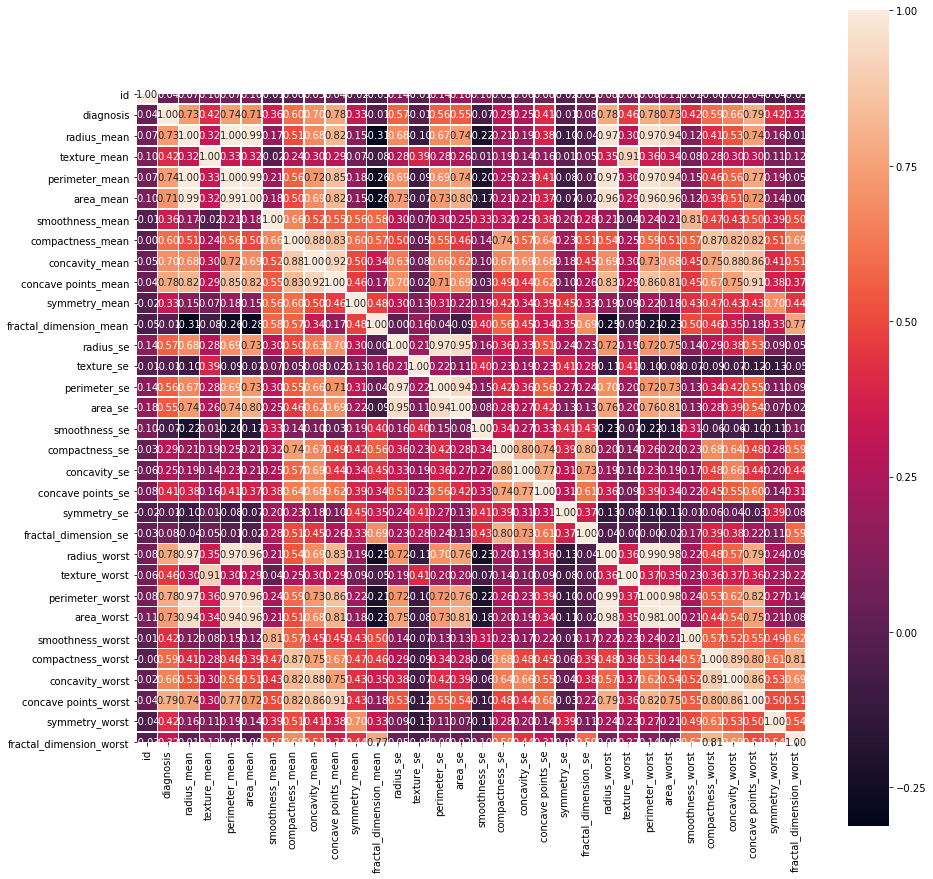

In [18]:
%pylab inline
import seaborn as sns
corr = data.corr(method='pearson')
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, annot=True, fmt=".2f", square=True, linewidths=.5,  ax=ax)

In [19]:
X = data.drop(['diagnosis'], axis=1) #убираем из dataFrame целевую функцию
y = data.diagnosis

In [38]:
# Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

### 6、please do data preprocesing 

In [39]:
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler # Масштабирование вещественных признаков с помощью StandardScaler.
import matplotlib.pyplot as plt # Построение графиков 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


Text(0.5, 1.0, 'Data. PCA projection')

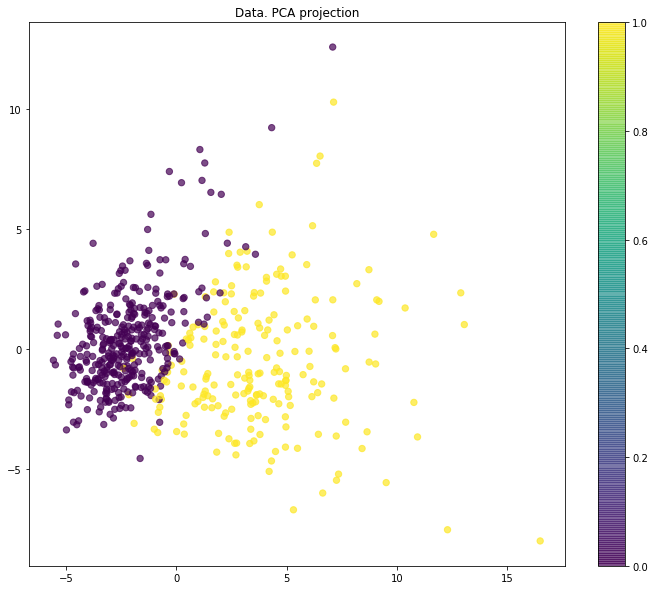

In [40]:
#Построение графиков 
plt.figure(figsize=(12,10))# размер
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=data['diagnosis'], alpha=0.7, s=40);
plt.colorbar()
plt.title('Data. PCA projection')

### 7、please use SVM to do classification

In [41]:
from sklearn.svm import SVC
name_model=SVC()

In [44]:
SVM_model.fit(X_train_scaled,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [45]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
svm_pred = SVM_model.predict(X_test_scaled)
print ("Accuracy Score : ",accuracy_score(y_test, svm_pred) )
print ("Recall Score: ",recall_score(y_test, svm_pred))
print ("Precision Score: ",precision_score(y_test, svm_pred))

Accuracy Score :  0.9590643274853801
Recall Score:  0.9180327868852459
Precision Score:  0.9655172413793104
